In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/josenalde/machinelearning/refs/heads/main/src/dataset/loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
# a) verificar balanceamento
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [5]:
# Separando as classes
classe_y = df[df['Loan_Status'] == 'Y']
classe_n = df[df['Loan_Status'] == 'N']

# Aplicando o downsampling
classe_y_downsampled = classe_y.sample(n=len(classe_n), random_state=42)

# Concatenando as classes
df_balanceado = pd.concat([classe_y_downsampled, classe_n])

# Embaralhando o DataFrame
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanceado['Loan_Status'].value_counts()

Loan_Status
N    192
Y    192
Name: count, dtype: int64

In [6]:
df_balanceado

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001786,Male,Yes,0,Graduate,NaN,5746,0.0,255.0,360.0,NaN,Urban,N
1,LP001630,Male,No,0,Not Graduate,No,2333,1451.0,102.0,480.0,0.0,Urban,N
2,LP002697,Male,No,0,Graduate,No,4680,2087.0,NaN,360.0,1.0,Semiurban,N
3,LP002446,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N
4,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,LP002586,Female,Yes,1,Graduate,No,3326,913.0,105.0,84.0,1.0,Semiurban,Y
380,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
381,LP001813,Male,No,0,Graduate,Yes,6050,4333.0,120.0,180.0,1.0,Urban,N
382,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [7]:
# b) remover colunas
df_enxuto = df_balanceado.drop(columns={'Loan_ID', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'},)
df_enxuto.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'LoanAmount', 'Loan_Status'],
      dtype='object')

In [8]:
df_enxuto.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,0,Graduate,NaN,5746,255.0,N
1,Male,No,0,Not Graduate,No,2333,102.0,N
2,Male,No,0,Graduate,No,4680,NaN,N
3,Male,Yes,2,Not Graduate,No,2309,125.0,N
4,Female,No,0,Graduate,No,4547,115.0,Y


In [9]:
print(df_enxuto.isnull().sum())

Gender              7
Married             1
Dependents          9
Education           0
Self_Employed      20
ApplicantIncome     0
LoanAmount         16
Loan_Status         0
dtype: int64


In [10]:
# c) preencher valores faltantes com a moda
for coluna in df_enxuto.columns:
  moda_coluna = df_enxuto[coluna].mode()[0]

  df_enxuto.fillna({coluna: moda_coluna}, inplace=True)

# d) confimar o sucesso
print(df_enxuto.isnull().sum())

Gender             0
Married            0
Dependents         0
Education          0
Self_Employed      0
ApplicantIncome    0
LoanAmount         0
Loan_Status        0
dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder

# e) transformar features categóricas
encoder = LabelEncoder()

colunas_para_codificar = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

for coluna in colunas_para_codificar:
  df_enxuto[coluna] = encoder.fit_transform(df_enxuto[coluna])

colunas_para_codificar.remove('Loan_Status')

df_enxuto.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
0,1,1,0,0,0,5746,255.0,0
1,1,0,0,1,0,2333,102.0,0
2,1,0,0,0,0,4680,120.0,0
3,1,1,2,1,0,2309,125.0,0
4,0,0,0,0,0,4547,115.0,1


In [12]:
# f) trocar 3+ por 3 na coluna Dependents
df_enxuto['Dependents'] = df_enxuto['Dependents'].replace('3+', '3').astype('int')

df_enxuto.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
0,1,1,0,0,0,5746,255.0,0
1,1,0,0,1,0,2333,102.0,0
2,1,0,0,0,0,4680,120.0,0
3,1,1,2,1,0,2309,125.0,0
4,0,0,0,0,0,4547,115.0,1
5,1,1,0,0,0,3087,136.0,0
6,0,0,0,0,0,1811,54.0,1
7,1,0,0,0,1,7085,84.0,1
8,1,1,1,0,0,2787,146.0,0
9,1,1,2,0,0,5042,185.0,0


In [13]:
from sklearn.preprocessing import StandardScaler

# g) padronizar features escalares
colunas_para_padronizar = ['LoanAmount', 'ApplicantIncome']

standard_scaler = StandardScaler()
df_enxuto[colunas_para_padronizar] = standard_scaler.fit_transform(df_enxuto[colunas_para_padronizar])

df_enxuto.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Status
0,1,1,0,0,0,0.055712,1.259226,0
1,1,0,0,1,0,-0.501977,-0.538200,0
2,1,0,0,0,0,-0.118474,-0.326738,0
3,1,1,2,1,0,-0.505899,-0.267999,0
4,0,0,0,0,0,-0.140206,-0.385477,1


In [14]:
# Separando features da target
data, target = df_enxuto.drop(columns={'Loan_Status',}), df_enxuto['Loan_Status']

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# h) criar 5 pipelines

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Lista de modelos e hiperparâmetros para GridSearch
models_and_params = [
    ('RandomForest', RandomForestClassifier(), {
        'model__n_estimators': [90, 100, 110],
        'model__max_depth': [8, 10, 12],
        'model__bootstrap': [True, False],
    }),
    ('KNN', KNeighborsClassifier(), {
        'model__n_neighbors': [7, 9, 11],
        'model__weights': ['uniform', 'distance'],
    }),
    ('DecisionTree', DecisionTreeClassifier(),{
        'model__criterion': ['gini', 'entropy', 'log_loss'],
        'model__max_depth': [8, 10, 12],
        'model__splitter': ['best', 'random'],
    }),
    ('GradientBoosting', GradientBoostingClassifier(),{
        'model__n_estimators': [100, 105, 110, 111],
        'model__learning_rate': [0.05, 0.1, 0.2],
        'model__max_depth': [8, 10, 12],
    }),
    ('XGBoost', XGBClassifier(),{
        'model__n_estimators': [73, 75, 80],
        'model__max_depth': [8, 10, 12],
    })
]

In [16]:
# xgboost==1.6.2

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Resultados
results = []
all_models = {}

# Curvas ROC
roc_curves = []

# Passo do padronização de colunas categóricas do Pipeline
preprocessor_categoricas = [(f'cat {col}', LabelEncoder(), col) for col in colunas_para_codificar]

for name, model, params in models_and_params:
    print(f"Treinando o modelo: {name}...")

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), colunas_para_padronizar),
            ('cat', OrdinalEncoder(), colunas_para_codificar)
        ]
    )

    pipeline = Pipeline([
      ('preprocessor', preprocessor),
      ('model', model)
    ])

    # GridSearch com validação cruzada
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Melhor modelo
    best_model = grid_search.best_estimator_
    all_models[name] = best_model

    # Previsões
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    # Avaliação
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

     # Pegando AUC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    print(f"AUC-ROC: {roc_auc}\n")

    # Salvar resultados
    results.append((name, roc_auc, classification_report(y_test, y_pred, output_dict=True)))

    # Curva ROC
    roc_curves.append((name, fpr, tpr, roc_auc))

# Comparação dos resultados
results_df = pd.DataFrame({
    'Model': [r[0] for r in results],
    'AUC': [r[1] for r in results]
})

Treinando o modelo: RandomForest...

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        34
           1       0.61      0.63      0.62        43

    accuracy                           0.57        77
   macro avg       0.56      0.56      0.56        77
weighted avg       0.57      0.57      0.57        77

AUC-ROC: 0.5506155950752394

Treinando o modelo: KNN...

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.45      0.50      0.47        34
           1       0.56      0.51      0.54        43

    accuracy                           0.51        77
   macro avg       0.51      0.51      0.50        77
weighted avg       0.51      0.51      0.51        77

AUC-ROC: 0.4921340629274965

Treinando o modelo: DecisionTree...


c:\Users\phely\anaconda3\envs\venv1\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.45      0.50      0.47        34
           1       0.56      0.51      0.54        43

    accuracy                           0.51        77
   macro avg       0.51      0.51      0.50        77
weighted avg       0.51      0.51      0.51        77

AUC-ROC: 0.5376196990424076

Treinando o modelo: GradientBoosting...

Classification Report for GradientBoosting:
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        34
           1       0.63      0.63      0.63        43

    accuracy                           0.58        77
   macro avg       0.58      0.58      0.58        77
weighted avg       0.58      0.58      0.58        77

AUC-ROC: 0.5902872777017784

Treinando o modelo: XGBoost...

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.54      0.59      0

In [17]:
print('\nDataset ordenado pela AUC:')
results_df = results_df.sort_values(by='AUC', ascending=False).head()
results_df


Dataset ordenado pela AUC:


,Model,AUC
3,GradientBoosting,0.590287
4,XGBoost,0.584131
0,RandomForest,0.550616
2,DecisionTree,0.537620
1,KNN,0.492134


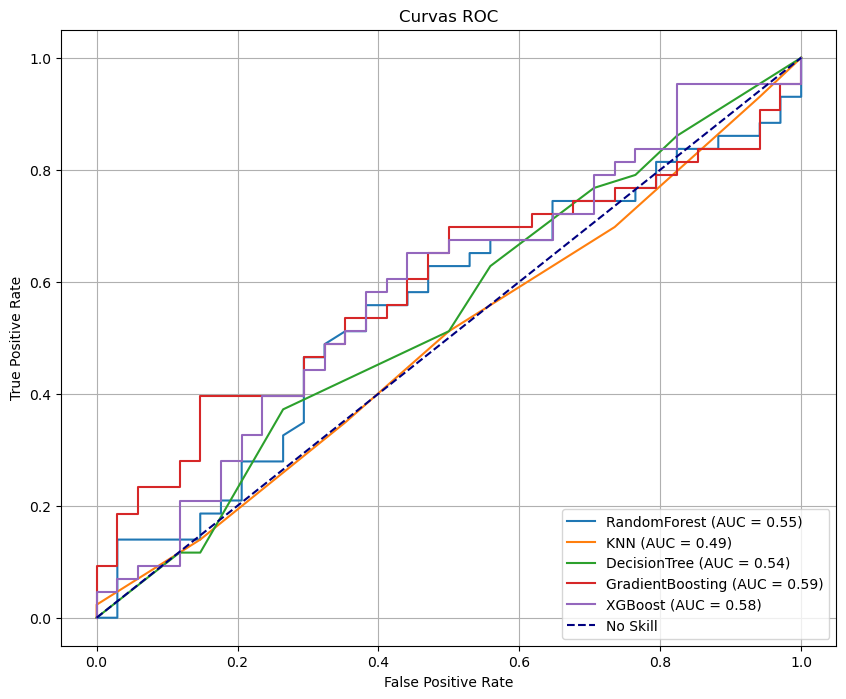

In [18]:
# Plotar todas as curvas ROC
plt.figure(figsize=(10, 8))
for name, fpr, tpr, roc_auc in roc_curves:
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [19]:
# Pegando o melhor modelo com
best_model_name = results_df.iloc[0]['Model']
best_model_name

'GradientBoosting'

In [20]:
best_pipeline = all_models[best_model_name]
best_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    ['LoanAmount', 'ApplicantIncome']),
                                   ('cat', OrdinalEncoder(),
                                    ['Gender', 'Married', 'Education',
                                     'Self_Employed'])])),
  ('model',
   GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators=111))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['LoanAmount', 'ApplicantIncome']),
                                 ('cat', OrdinalEncoder(),
                                  ['Gender', 'Married', 'Education',
                                   'Self_Employed'])]),
 'model': GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators=111),
 'preprocessor__force_int_remainder_cols': True,
 'preprocessor__n_jobs': None,
 'preprocessor__re

In [21]:
import joblib

# Salvando o pipeline treinado
joblib.dump(best_pipeline, "flask_app/melhor_pipeline.pkl")

# Carregar o pipeline treinado
modelo_carregado = joblib.load("flask_app/melhor_pipeline.pkl")